# 컨텐츠 기반 추천시스템

리뷰 군집화 아이템 기반 추천

In [56]:
import matplotlib
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
fontprop = fm.FontProperties(fname=fontpath, size=8) 

In [57]:
#폰트종류설정
plt.rcParams["font.family"] = 'NanumGothic'

#폰트크기설정
#plt.rcParams["font.size"] = 20

## 데이터 전처리

In [59]:
import konlpy
import urllib.request
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

from konlpy.tag import Mecab
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

/tmp/ipykernel_17118/691330863.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [63]:
import pandas as pd
import numpy as np
data_df = pd.read_csv('../data/ulsan_rest_table_ver3.csv')
data_df.head()

p_id   place_id   u_id user_id  score  \
0     0  225토마토스트릿  24506    힘내라힘      2   
1     0  225토마토스트릿  24493     히둥이      5   
2     0  225토마토스트릿  24328     황영하      5   
3     0  225토마토스트릿  24247     황규현      5   
4     0  225토마토스트릿  24022    호두과자      5   

                                             comment  
0                                   분위기에 비해 맛은 쏘쏘...  
1                                                NaN  
2  파스타 너무 맛있게 잘 먹었어요 태화동에 맛집이 별로 없어서 아쉬웠는데 맛집을 발견...  
3  스테이크 부위가 바뀐것같은데 바뀐고기가 훨씬 좋은것 같아요..!.!!! 육향도 좋고...  
4                                                NaN

In [72]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35618 entries, 0 to 54499
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   p_id      35618 non-null  int64 
 1   place_id  35618 non-null  object
 2   u_id      35618 non-null  int64 
 3   user_id   35618 non-null  object
 4   score     35618 non-null  int64 
 5   comment   35567 non-null  object
dtypes: int64(3), object(3)
memory usage: 1.9+ MB


In [74]:
print(data_df.isnull().sum())

data_df = data_df.dropna(how='any')

p_id         0
place_id     0
u_id         0
user_id      0
score        0
comment     51
dtype: int64


In [75]:
data_df['comment'] = data_df['comment'].str.replace("[^ㄱ-하-ㅣ가-힣 ]", "")

/tmp/ipykernel_17118/2728893579.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data_df['comment'] = data_df['comment'].str.replace("[^ㄱ-하-ㅣ가-힣 ]", "")


In [76]:
data_df['comment'].replace('', np.nan, inplace=True)
print(len(data_df))
print(data_df.isnull().sum())

35567
p_id        0
place_id    0
u_id        0
user_id     0
score       0
comment     0
dtype: int64


In [77]:
data_df.head()

p_id   place_id   u_id user_id  score  \
0     0  225토마토스트릿  24506    힘내라힘      2   
2     0  225토마토스트릿  24328     황영하      5   
3     0  225토마토스트릿  24247     황규현      5   
5     0  225토마토스트릿  21835      쭌쭌      1   
6     0  225토마토스트릿  20092      재우      5   

                                             comment  
0                                      분위기에 비해 맛은 쏘쏘  
2  파스타 너무 맛있게 잘 먹었어요 태화동에 맛집이 별로 없어서 아쉬웠는데 맛집을 발견...  
3  스테이크 부위가 바뀐것같은데 바뀐고기가 훨씬 좋은것 같아요 육향도 좋고 부드러워서 ...  
5  분위기는 좋으나 바닷물을 마신기분이랄까요음식보단 물을 많이 먹어 기분좋은 포만감을 ...  
6  분위기며 맛이며 그냥 너무좋아요 가족끼리가도 너무좋을거같고 부산 광안리에도 새로 오...

## 토큰화 및 불용어 제거

In [70]:
file = open('../data/stop_word.txt', 'r')

stopWord = []
l = ''
while True:
    l = file.readline()
    stopWord.append(l[:-1])
    if l == '':
        break

In [71]:
len(stopWord)

676

In [78]:
from konlpy.tag import Mecab

mecab =Mecab()

reviews = []
for sentence in data_df['comment']:
    reviews.append([word for word in mecab.nouns(str(sentence)) if not word in stopWord])

print(len(reviews))
data_df['reviews'] = reviews

35567


In [79]:
data_df.head()

p_id   place_id   u_id user_id  score  \
0     0  225토마토스트릿  24506    힘내라힘      2   
2     0  225토마토스트릿  24328     황영하      5   
3     0  225토마토스트릿  24247     황규현      5   
5     0  225토마토스트릿  21835      쭌쭌      1   
6     0  225토마토스트릿  20092      재우      5   

                                             comment  \
0                                      분위기에 비해 맛은 쏘쏘   
2  파스타 너무 맛있게 잘 먹었어요 태화동에 맛집이 별로 없어서 아쉬웠는데 맛집을 발견...   
3  스테이크 부위가 바뀐것같은데 바뀐고기가 훨씬 좋은것 같아요 육향도 좋고 부드러워서 ...   
5  분위기는 좋으나 바닷물을 마신기분이랄까요음식보단 물을 많이 먹어 기분좋은 포만감을 ...   
6  분위기며 맛이며 그냥 너무좋아요 가족끼리가도 너무좋을거같고 부산 광안리에도 새로 오...   

                                             reviews  
0                                     [분위기, 맛, 쏘, 쏘]  
2                         [파스타, 태화동, 맛집, 맛집, 발견, 기분]  
3                          [스테이크, 부위, 데, 고기, 육향, 고기]  
5  [분위기, 바닷물, 기분, 음식, 물, 기분, 포만감, 주문, 시, 소금, 간, 부...  
6  [분위기, 맛, 가족, 거, 부산, 광안리, 오픈, 거기, 사람, 예약, 그만큼, ...

## Word2Vec 생성

In [80]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from matplotlib import font_manager as fm
from matplotlib import rc

In [81]:
word2vec = Word2Vec(reviews, min_count=3, vector_size=100, window=5, sg=0)
word2vec

In [83]:
word2vec.wv.most_similar('친절')

[('응대', 0.893233597278595),
 ('불친절', 0.8924363851547241),
 ('서비스', 0.8836341500282288),
 ('교육', 0.8773137927055359),
 ('마인드', 0.8623461723327637),
 ('자세', 0.8476330041885376),
 ('소통', 0.8461484313011169),
 ('태도', 0.8456138968467712),
 ('카운터', 0.8455168604850769),
 ('내외분', 0.8383936882019043)]

## t-sne을 활용한 시각화

In [84]:
tsne = TSNE(n_components=3) # n_components는 차원을 뜻함 

In [85]:
vocab = word2vec.wv.key_to_index
similarity = word2vec.wv[vocab]

In [86]:
import pandas as pd

transform_similarity = tsne.fit_transform(similarity) # 전체 similarity를 tsne n_components만큼 변형 ex n=2 -> 2차원
df = pd.DataFrame(transform_similarity, index=vocab, columns=['x', 'y', 'z'])
df[0:10]

x          y          z
맛   16.114952  -9.589945  11.518539
곳   14.739419   3.203571  11.742282
친절  21.253466  -1.184684   8.964575
음식  17.968683  -6.024000  12.850028
가격  17.829025  -9.729737  12.378427
고기  17.793537 -12.846073   9.313226
집   16.864542 -15.104815   7.040296
수   16.309065   0.025069  12.381248
커피  14.430732   4.619410  15.470901
맛집  19.392290  -8.305316   5.313596

In [87]:
df.index

Index(['맛', '곳', '친절', '음식', '가격', '고기', '집', '수', '커피', '맛집',
       ...
       '칩', '손자', '띠', '합격', '첫날', '물소리', '배내', '과대', '긋', '재'],
      dtype='object', length=4588)

/usr/local/lib/python3.8/dist-packages/matplotlib/collections.py:1080: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


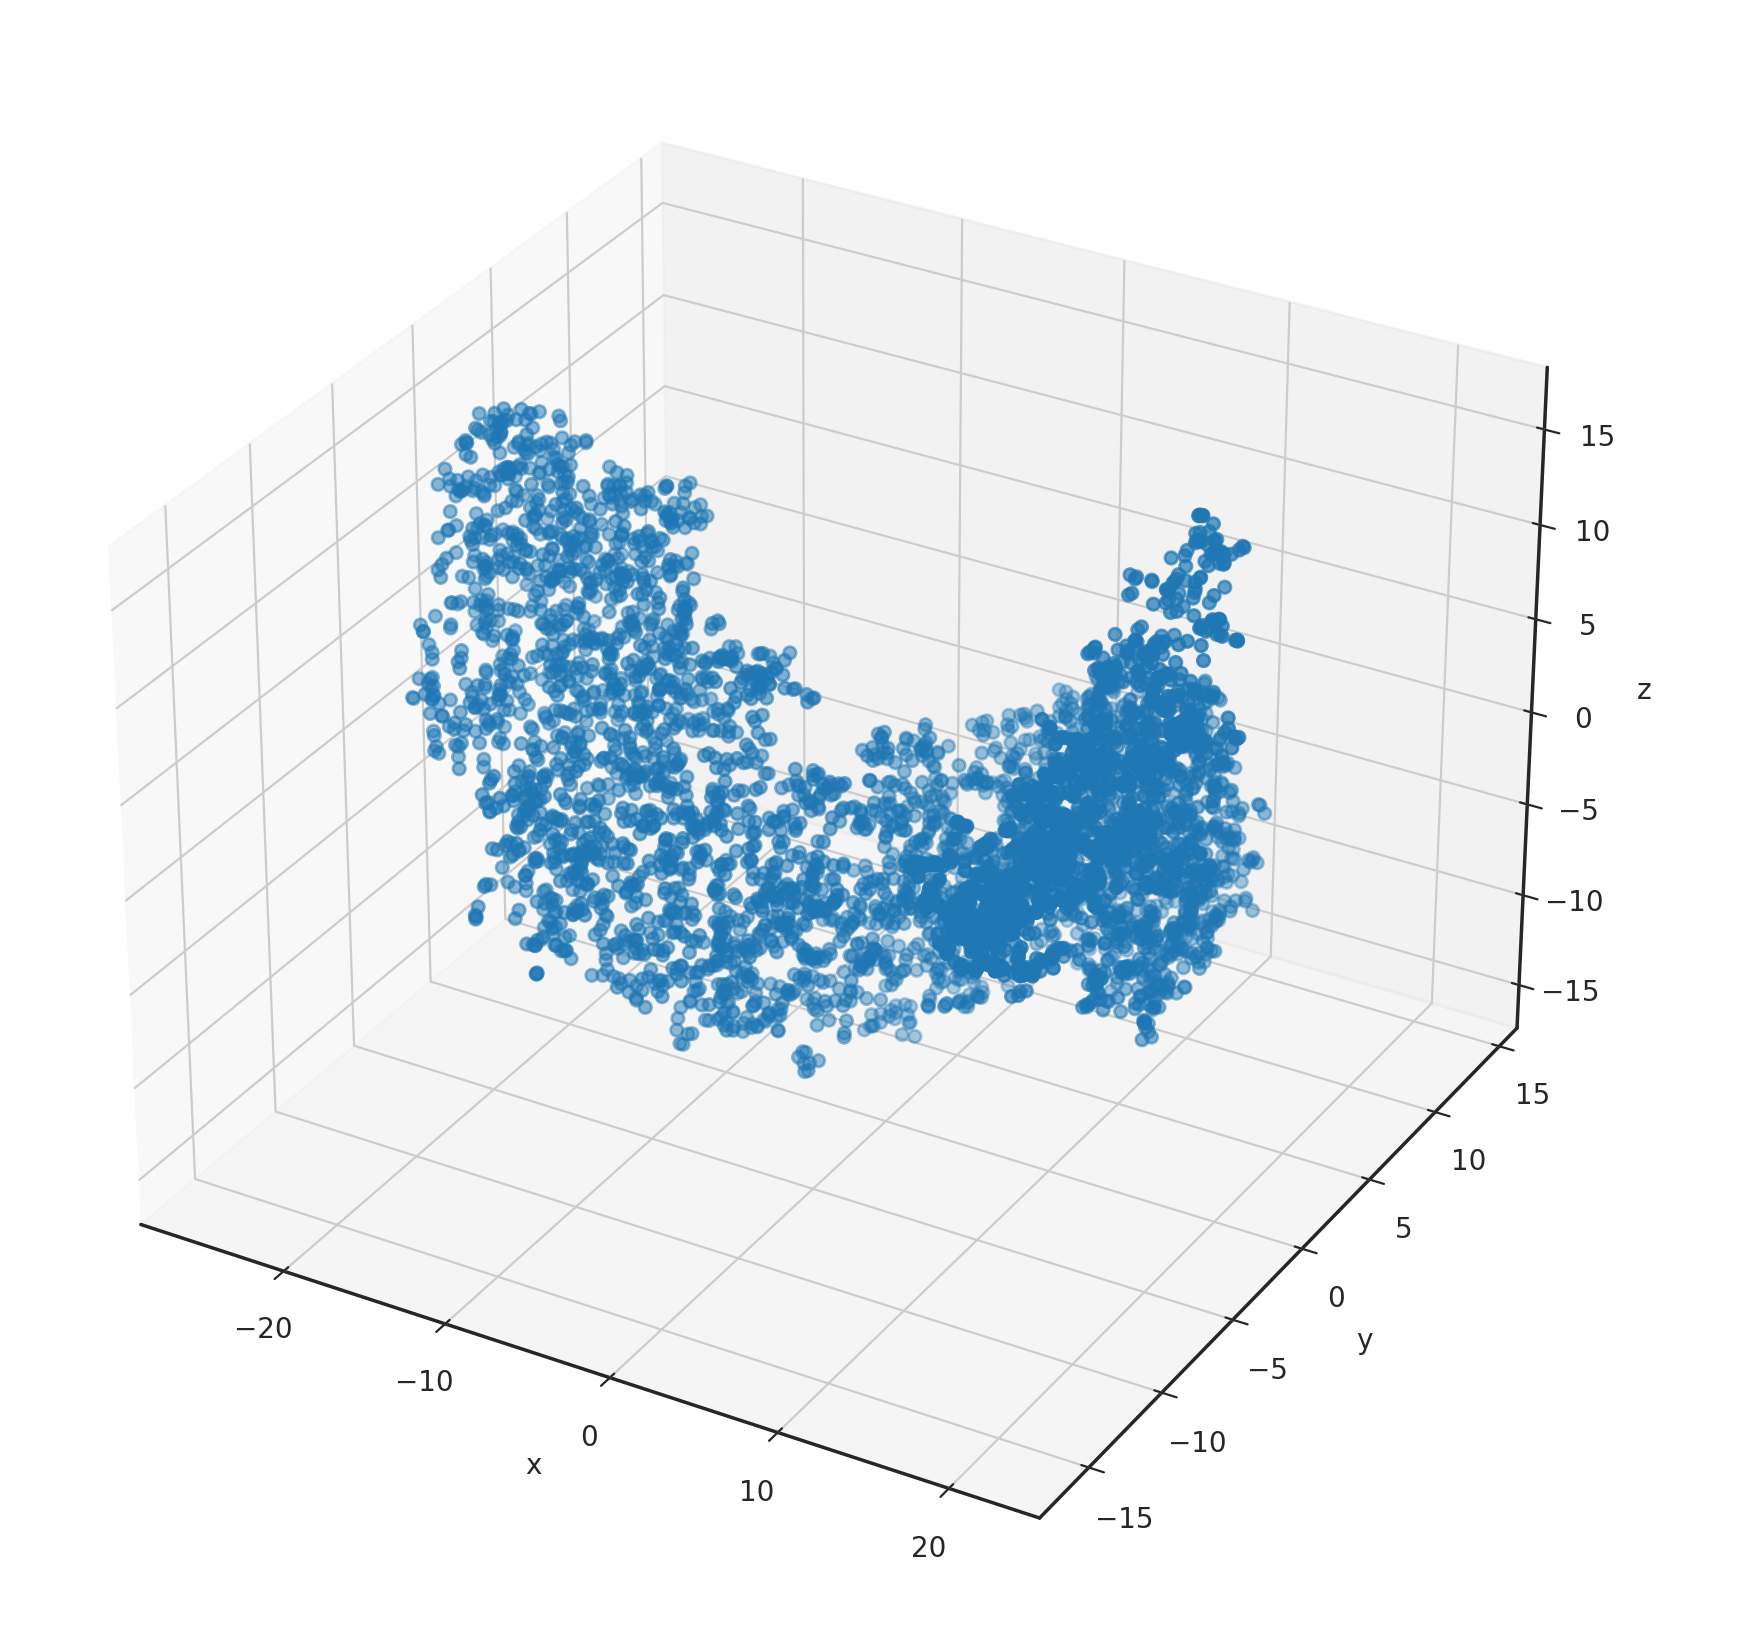

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
# plt.style.use('seaborn-white')
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig)
fig.add_axes(ax)
# ax = fig.add_subplot(111, projection = '3d')
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

sc = ax.scatter(df['x'], df['y'], df['z'])
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

## 군집화

### 계층적 군집화

#### ward

In [89]:
from sklearn.cluster import AgglomerativeClustering

ward = AgglomerativeClustering(n_clusters=10, linkage='ward')
predict = ward.fit_predict(df)
# data_df['clusters'] = predict
df['predict'] = predict

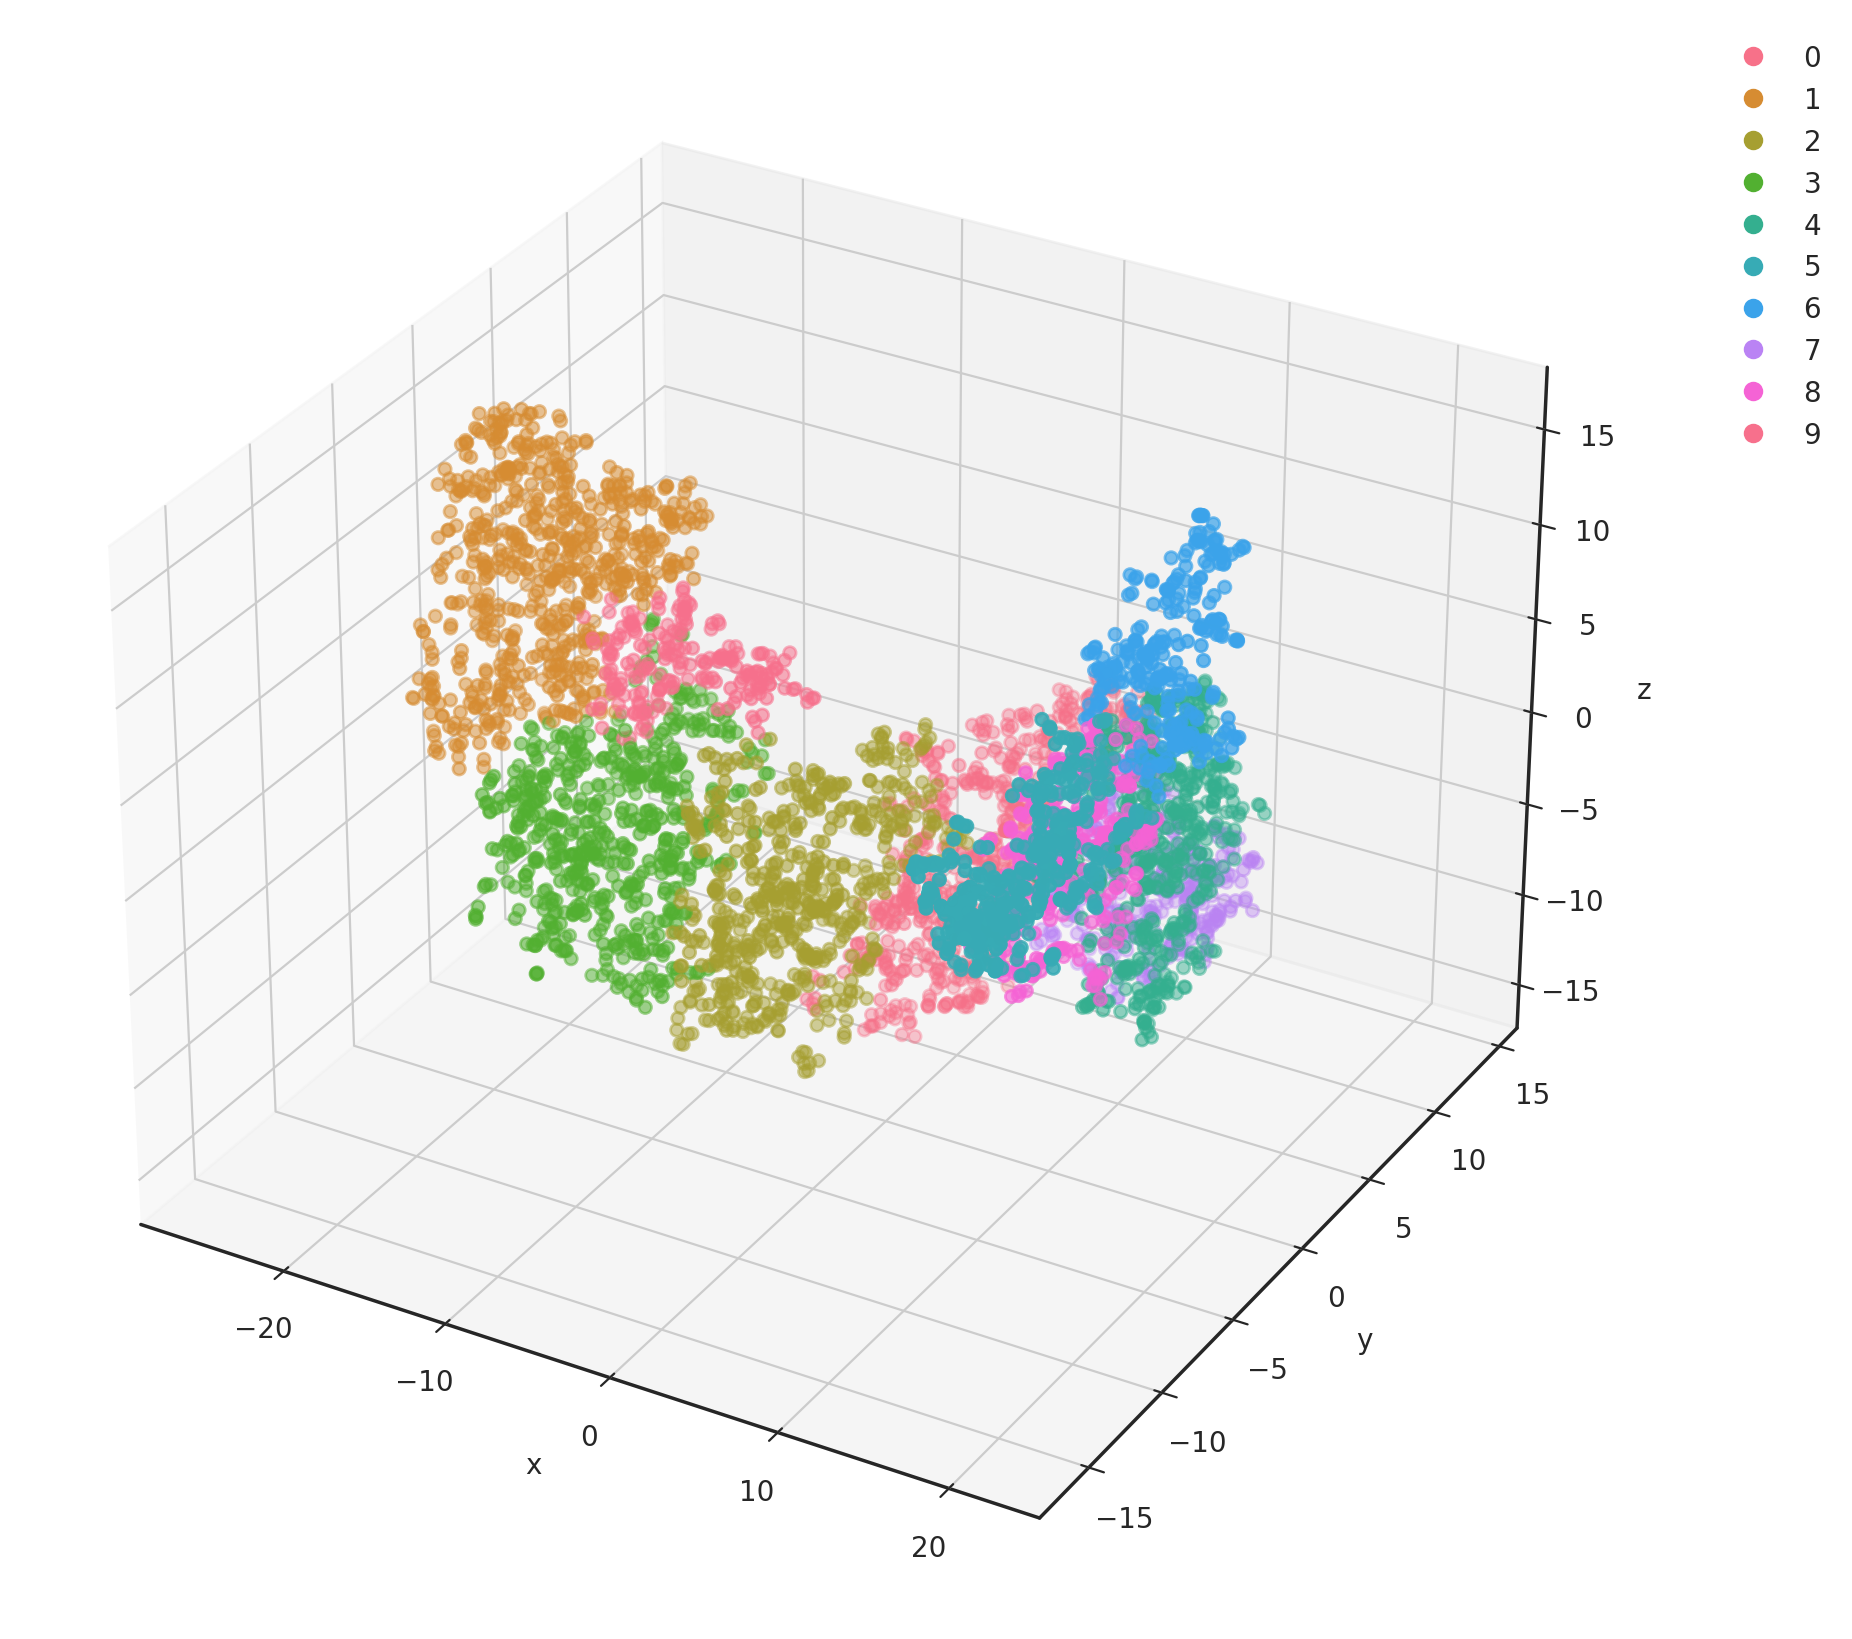

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
# plt.style.use('seaborn-white')
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig)
fig.add_axes(ax)
# ax = fig.add_subplot(111, projection = '3d')
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

sc = ax.scatter(df['x'], df['y'], df['z'], c=df['predict'], cmap=cmap)
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

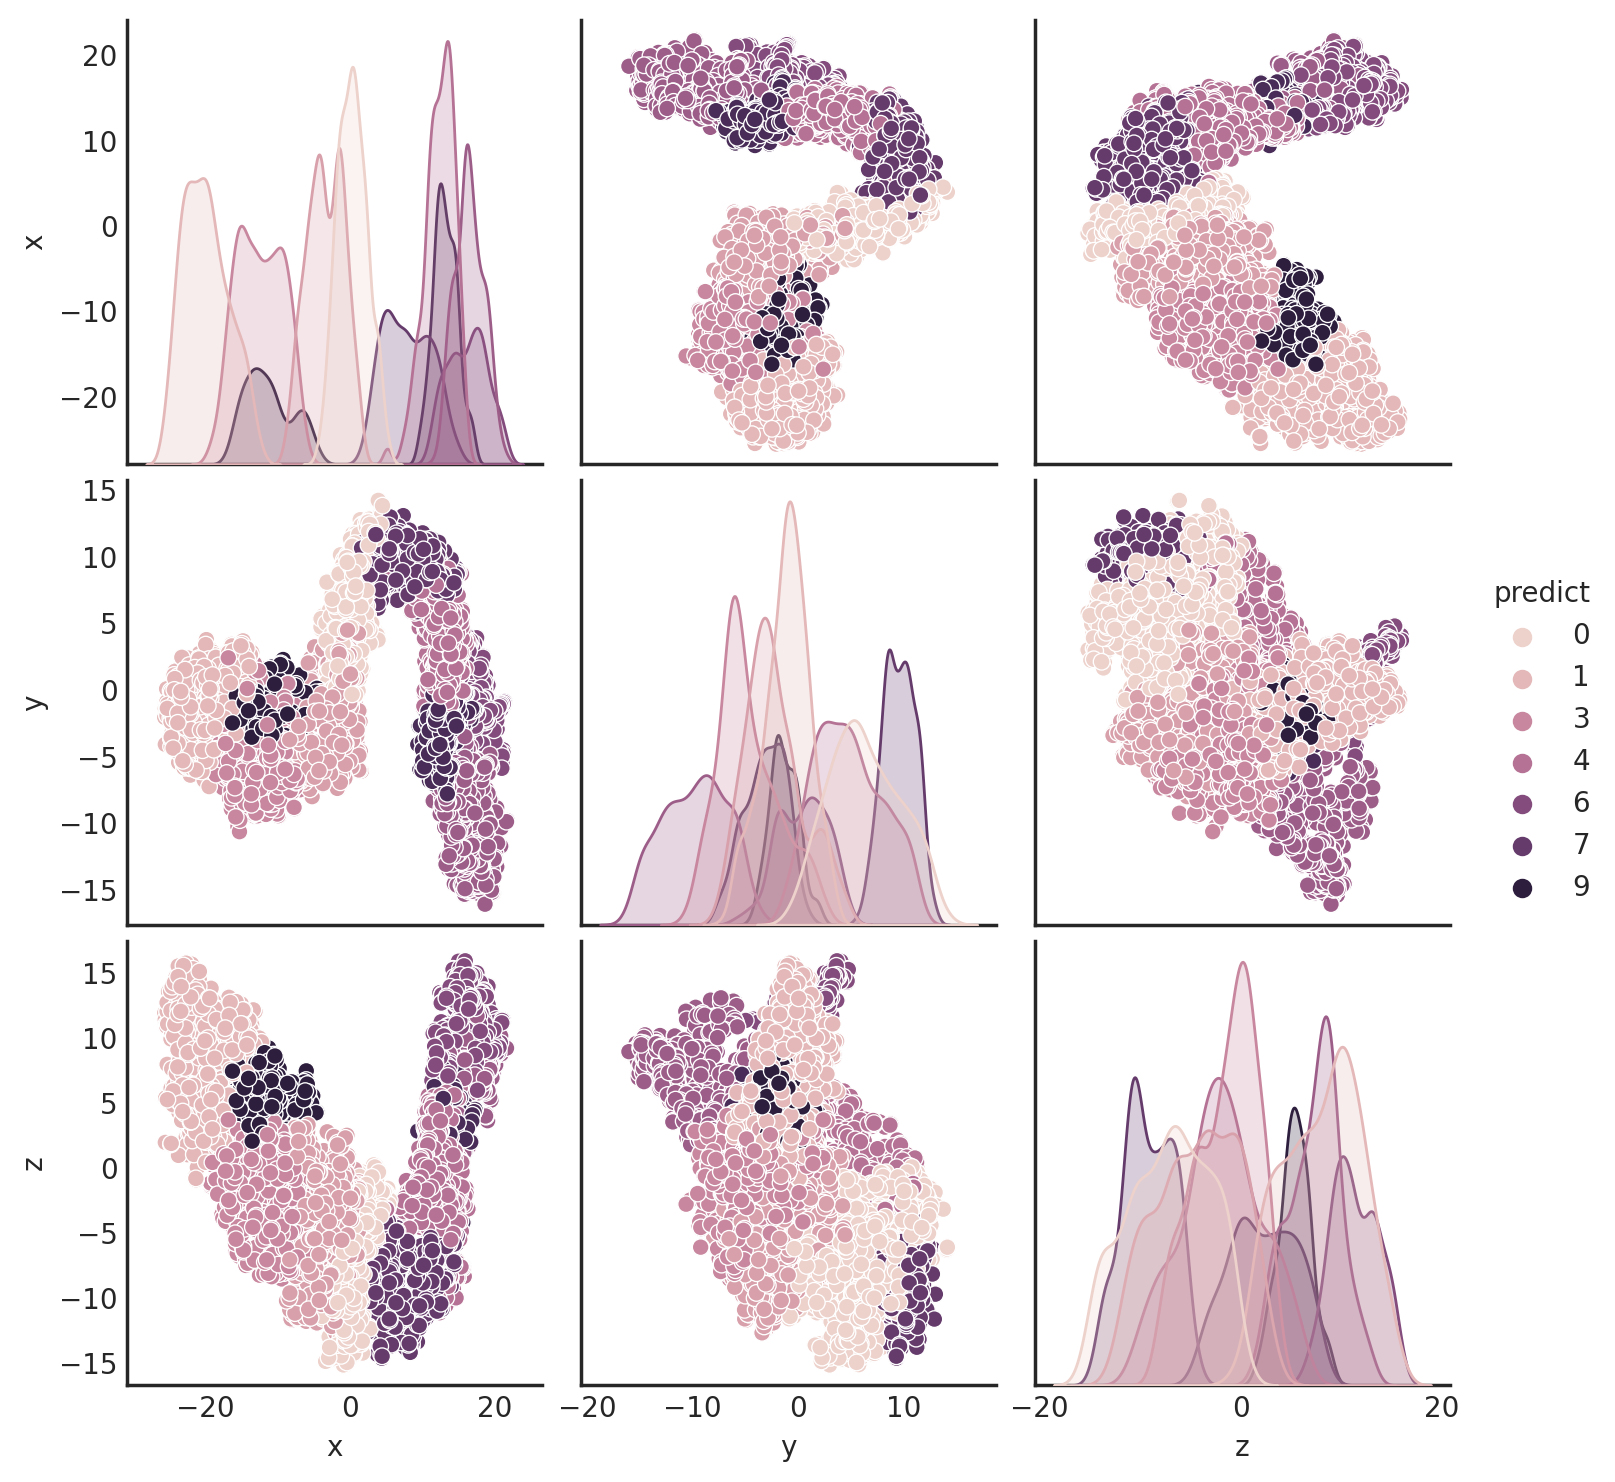

In [91]:
sns.pairplot(df, hue='predict')

<Axes: xlabel='predict', ylabel='count'>

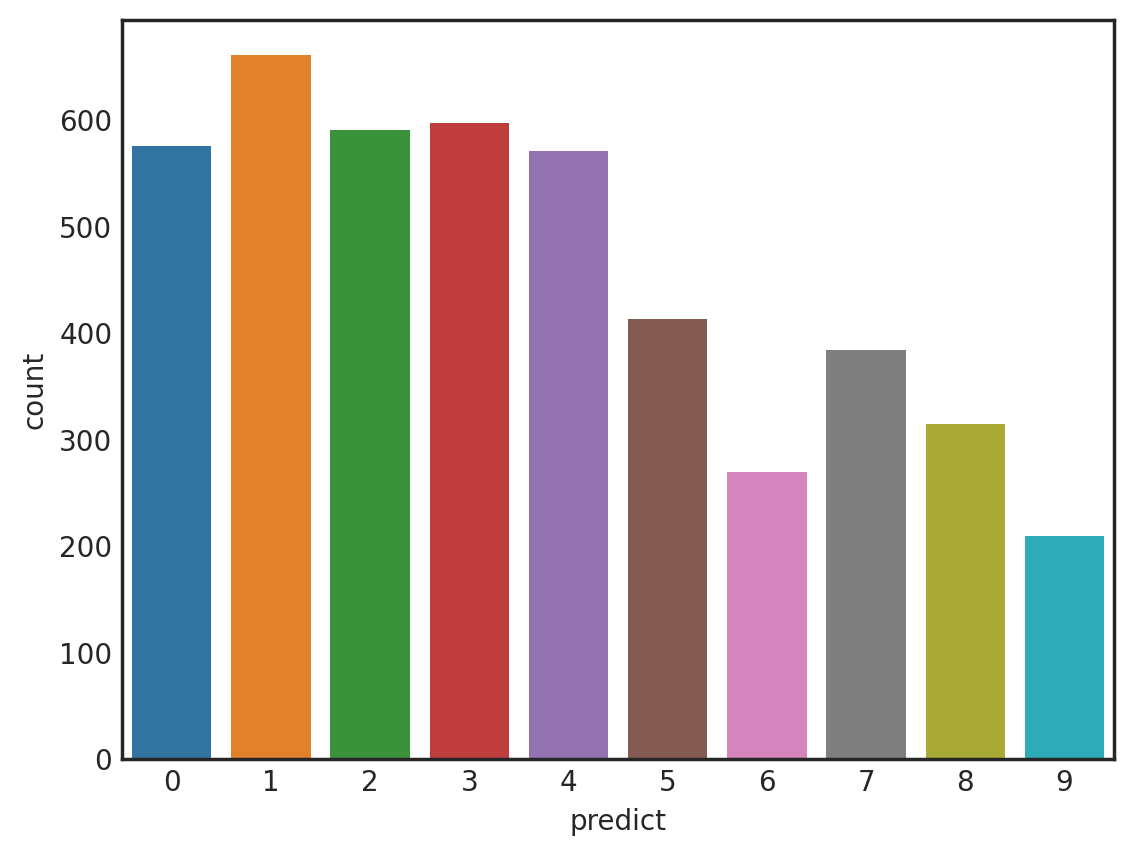

In [92]:
sns.countplot(x=df['predict'])

In [93]:
cluster0 = list(df[df['predict']==0].index)
cluster1 = list(df[df['predict']==1].index)
cluster2 = list(df[df['predict']==2].index)
cluster3 = list(df[df['predict']==3].index)
cluster4 = list(df[df['predict']==4].index)
cluster5 = list(df[df['predict']==5].index)
cluster6 = list(df[df['predict']==6].index)
cluster7 = list(df[df['predict']==7].index)
cluster8 = list(df[df['predict']==8].index)
cluster9 = list(df[df['predict']==9].index)

In [94]:
cluster0[:10]

['중화요리', '장어구이', '옴', '햇살', '풍광', '찬류', '유명세', '산채', '적정', '느']

In [95]:
cluster1[:10]

['춘', '주고', '상관', '웰빙', '가심', '식성', '옻닭', '오리스', '별맛', '설렁탕']

In [96]:
cluster2[:10]

['분위', '복요리', '사모님', '적당', '농도', '무거동', '추천요', '울산역', '마시', 'ㅣ']

In [97]:
cluster3[:10]

['가자미회', '제입맛에', '환장', '개인차', '소불고기', '술집', '다림', '함정', '게요', '착석']

In [98]:
cluster4[:10]

['접대', '단위', '연인', '방갈로', '점심때', '내요', '독특', '전국', '회전율', '출장']

In [99]:
cluster5[:10]

['맛', '음식', '가격', '고기', '집', '맛집', '울산', '듯', '최고', '양']

In [100]:
cluster9[:10]

['좁음', '노후', '계', '엔', '아트', '숩니다', '지원', '안성맞춤', '더러움', '타워']

In [101]:
item_Table = pd.DataFrame(columns=['p_id', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])

In [103]:
data_df['p_id'].iloc[0]

0

In [105]:
for idx, row in enumerate(data_df['reviews']):
    c0, c1, c2, c3, c4, c5, c6, c7, c8, c9 = 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
    for word in list(row):
        if word in cluster0:
            c0 += 1
        elif word in cluster1:
            c1 += 1
        elif word in cluster2:
            c2 += 1
        elif word in cluster3:
            c3 += 1
        elif word in cluster4:
            c4 += 1
        elif word in cluster5:
            c5 += 1
        elif word in cluster6:
            c6 += 1
        elif word in cluster7:
            c7 += 1
        elif word in cluster8:
            c8 += 1
        else:
            c9 += 1

    new_data = pd.DataFrame({'p_id': [data_df['p_id'].iloc[idx]], '0': [c0], '1': [c1], '2': [c2], '3': [c3], '4': [c4], '5': [c5], '6': [c6], '7': [c7], '8': [c8], '9': [c9]})
    item_Table = pd.concat([item_Table, new_data], axis=0, names=['p_id', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])

In [106]:
item_Matrix = item_Table.groupby('p_id').mean()

In [107]:
from sklearn.metrics.pairwise import cosine_similarity

In [108]:
item_Matrix = item_Matrix.to_numpy()

similarity = cosine_similarity(item_Matrix, item_Matrix)
print('코사인 유사도 연산 결과 :',similarity.shape)

코사인 유사도 연산 결과 : (534, 534)


In [109]:
def get_recommendations(p_id, sim=similarity):
    # 해당 영화와 모든 영화와의 유사도를 가져온다.
    sim_scores = list(enumerate(sim[p_id]))

    # 유사도에 따라 영화들을 정렬한다.
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # 가장 유사한 10개의 영화를 받아온다.
    sim_scores = sim_scores[1:11]

    # 가장 유사한 10개의 영화의 인덱스를 얻는다.
    movie_indices = [idx[0] for idx in sim_scores]

    # 가장 유사한 10개의 영화의 제목을 리턴한다.
    return sim_scores

In [110]:
get_recommendations(400)

[(404, 0.9992298496605199),
 (47, 0.9991201553657987),
 (479, 0.9989991202099822),
 (402, 0.9989077650908955),
 (253, 0.9984837915697612),
 (435, 0.9982361580072994),
 (39, 0.9981941316277245),
 (407, 0.9980981408840645),
 (244, 0.9980264152030268),
 (35, 0.9979309468936189)]

### 비계층적 군집화

#### K-Means

In [83]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8)
predict = kmeans.fit_predict(df)
results = df
results['predict'] = predict

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


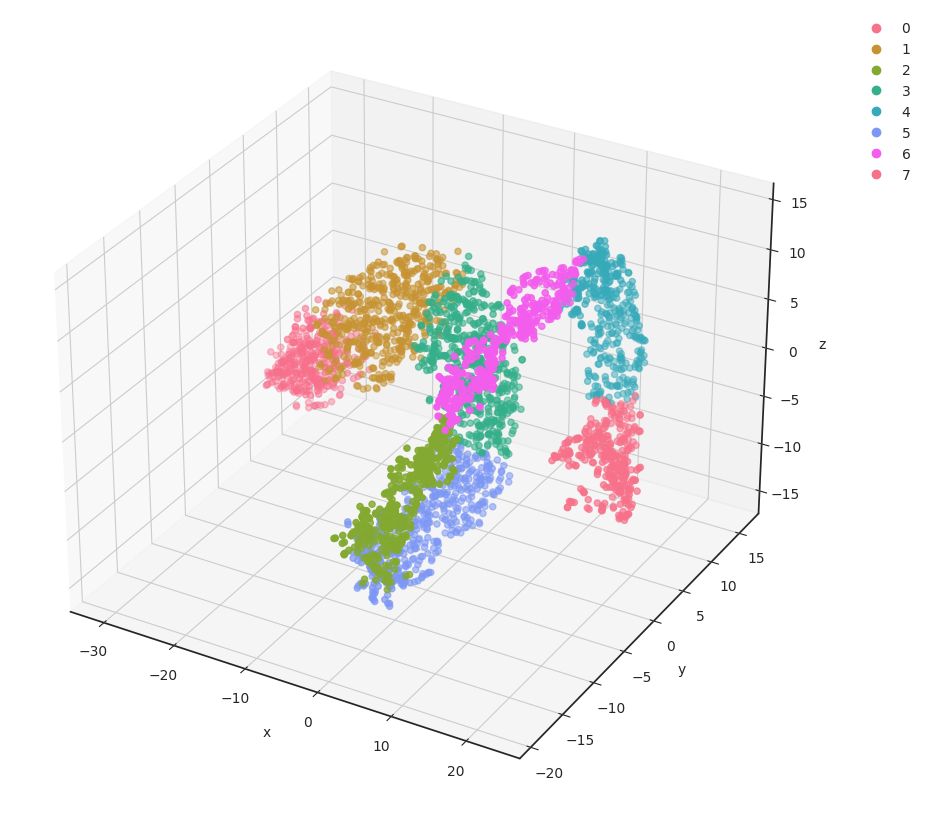

In [84]:
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig)
fig.add_axes(ax)
# ax = fig.add_subplot(111, projection = '3d')
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

sc = ax.scatter(df['x'], df['y'], df['z'], c=df['predict'], cmap=cmap)
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

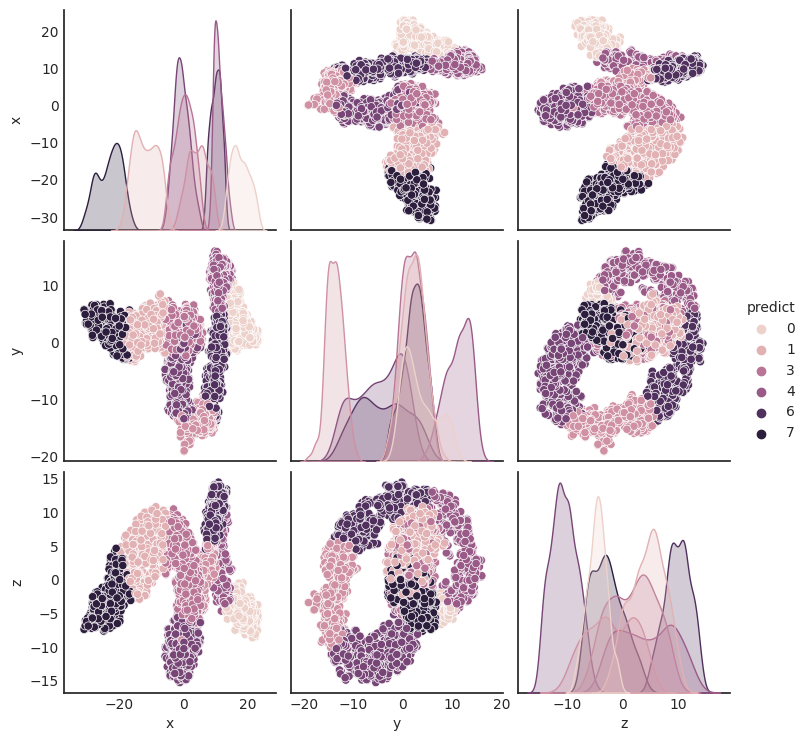

In [85]:
sns.pairplot(df, hue='predict')

<Axes: xlabel='predict', ylabel='count'>

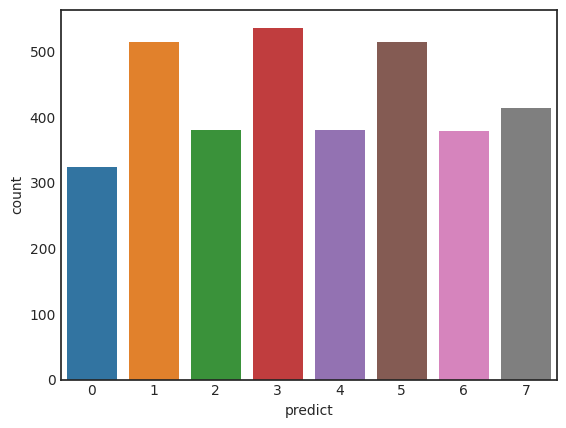

In [86]:
sns.countplot(x=df['predict'])

In [87]:
cluster0 = list(df[df['predict']==0].index)
cluster1 = list(df[df['predict']==1].index)
cluster2 = list(df[df['predict']==2].index)
cluster3 = list(df[df['predict']==3].index)
cluster4 = list(df[df['predict']==4].index)
cluster5 = list(df[df['predict']==5].index)

In [88]:
item_Matrix = pd.DataFrame(columns=['p_id', 'c0', 'c1', 'c2', 'c3', 'c4', 'c5'])

In [90]:
for idx, row in enumerate(table_df['reviews']):
    c0, c1, c2, c3, c4, c5 = 0, 0, 0, 0, 0, 0
    for word in list(row):
        if word in cluster0:
            c0 += 1
        elif word in cluster1:
            c1 += 1
        elif word in cluster2:
            c2 += 1
        elif word in cluster3:
            c3 += 1
        elif word in cluster4:
            c4 += 1
        else:
            c5 += 1
    new_data = pd.DataFrame({'p_id': [table_df['p_id'].iloc[idx]], 'c0': [c0], 'c1': [c1], 'c2': [c2], 'c3': [c3], 'c4': [c4], 'c5': [c5]})
    item_Matrix = pd.concat([item_Matrix, new_data], axis=0, names=['p_id', 'c0', 'c1', 'c2', 'c3', 'c4', 'c5'])